# GluonTS - Transfer Learning Approach (quarterly) 

- Two datasets: A and B
- Dataset A: Dataset subsetted by frequency, i.e. `m4_quarterly_atm`
- Dataset B: Dataset subsetted by frequency and by domain, i.e. `m4_quarterly_industry`
- Network A: Trained on dataset A
- Network B: Trained on dataset B
- Both networks are evaluated on dataset B. 

- Adjust epochs to account for different size of the datasets

Goal: Check TZ1: "Does the network learn from time series of the same domain or is it helpful to use time series from other domains?"

- Both networks are trained for ten trials (deepar) or three trials (deepstate)

Note that there are already results where a network is trained on `m4_frequency_domain` and evaluated on the same network.

In [3]:
!pip install mxnet=="1.4.1"

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
!pip install gluonts

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Imports



In [5]:
import gluonts
import mxnet

print(gluonts.__version__)
print(mxnet.__version__)

0.4.2
1.4.1


In [6]:
# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar


INFO:root:Using CPU


In [7]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_daily_domain', 'm4_daily_id', 'm4_hourly', 'm4_hourly_id', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_domain', 'm4_monthly_end032014', 'm4_monthly_end052015', 'm4_monthly_end092007', 'm4_monthly_finance', 'm4_monthly_id', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_micro_atm', 'm4_monthly_nonmicro_10975_seed42', 'm4_monthly_nonmicro_10975_seed43', 'm4_monthly_nonmicro_10975_seed44', 'm4_monthly_nonmicro_10975_seed45', 'm4_monthly_nonmicro_10975_seed46', 'm4_monthly_nonmicro_10975_seed47', 'm4_monthly_nonmicro_10975_seed48', 'm4_monthly_nonmicro_10975_seed49', 'm4_monthly_nonmicro_10975_seed50', 'm4_monthly_nonmicro_10975_seed51', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_domain', 'm4_quarterly_end2003q3', 'm4_quarterly_end2013q1', 'm4_quarterly_end2015q1', 'm4_quarterly_finance', 'm4_quarterly_id

In [8]:
dataset = get_dataset("m4_weekly", regenerate=False)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly.


### mv the data

Before moving on: Move the respective data according the required folder structure. In AWS:

- `mv [dataname] ../../.mxnet/gluon-ts/datasets/`

## Check the data

In [5]:
dataname_a = "m4_quarterly_atm"
dataset_a = get_dataset(dataname_a, regenerate=False)
len(dataset_a.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_atm.


24000

In [6]:
dataname_b1 = "m4_quarterly_macro"
dataset_b1 = get_dataset(dataname_b1, regenerate=False)
len(dataset_b1.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_macro.


5315

In [7]:
dataname_b2 = "m4_quarterly_micro"
dataset_b2 = get_dataset(dataname_b2, regenerate=False)
len(dataset_b2.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_micro.


6020

In [8]:
dataname_b3 = "m4_quarterly_other"
dataset_b3 = get_dataset(dataname_b3, regenerate=False)
len(dataset_b3.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_other.


865

### Dataset A


dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])
length train: 24000
length test: 24000

start:
 1750-01-31 00:00:00
target:
 [7407.412  7528.566  7374.709  7395.5146 7654.008  7686.8477 7578.191
 7904.3765 7744.0493 7889.909 ]
feat_static_cat:
 [1]


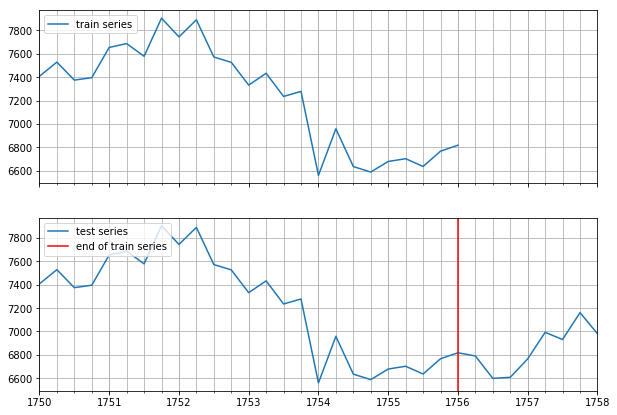

In [9]:
train_entry_a = next(iter(dataset_a.train))
test_entry_a = next(iter(dataset_a.test))

print(train_entry_a.keys())
print(test_entry_a.keys())
print("length train:", len(dataset_a.train))
print("length test:", len(dataset_a.test))


print("\nstart:\n",train_entry_a["start"])
print("target:\n", train_entry_a["target"][:10])
print("feat_static_cat:\n", train_entry_a["feat_static_cat"])

train_series_a = to_pandas(train_entry_a)
test_series_a = to_pandas(test_entry_a)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series_a.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series_a.plot(ax=ax[1])
ax[1].axvline(train_series_a.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

## Dataset B

dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])
length train: 5315
length test: 5315

start:
 1750-01-31 00:00:00
target:
 [7407.412  7528.566  7374.709  7395.5146 7654.008  7686.8477 7578.191
 7904.3765 7744.0493 7889.909 ]
feat_static_cat:
 [1]


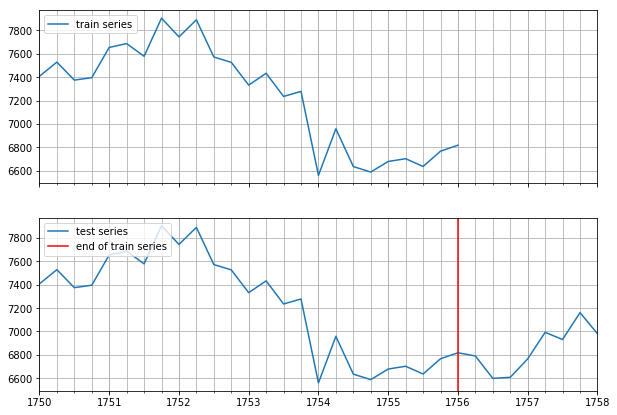

In [10]:
dataset_b = dataset_b1

train_entry_b = next(iter(dataset_b.train))
test_entry_b = next(iter(dataset_b.test))

print(train_entry_b.keys())
print(test_entry_b.keys())
print("length train:", len(dataset_b.train))
print("length test:", len(dataset_b.test))

print("\nstart:\n",train_entry_b["start"])
print("target:\n", train_entry_b["target"][:10])
print("feat_static_cat:\n", train_entry_b["feat_static_cat"])

train_series_b = to_pandas(train_entry_b)
test_series_b = to_pandas(test_entry_b)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series_b.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series_b.plot(ax=ax[1])
ax[1].axvline(train_series_b.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

## Comparison of both datasets

- Compare whether both datasets have the same length


In [11]:
# Check length
print("Length test train:", len(dataset_a.train) == len(dataset_b.train))
print("Length test test:", len(dataset_a.test) == len(dataset_b.test))

# Check frequency
print("Frequency test:",(dataset_a.metadata.freq == dataset_b.metadata.freq))


Length test train: False
Length test test: False
Frequency test: True


## Modeling: DeepAR

In [12]:
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

from gluonts.model.deepar import DeepAREstimator

In [13]:
# A: dataset_a
# B: dataset_b
print(dataset_a)
print("\n", dataset_b)

TrainDatasets(metadata=MetaData(freq='3M', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat', cardinality='24000')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=8), train=<gluonts.dataset.common.FileDataset object at 0x7f49e2f3c240>, test=<gluonts.dataset.common.FileDataset object at 0x7f49e2f56ef0>)

 TrainDatasets(metadata=MetaData(freq='3M', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat', cardinality='5315')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=8), train=<gluonts.dataset.common.FileDataset object at 0x7f49e2ef92b0>, test=<gluonts.dataset.common.FileDataset object at 0x7f49e2ef9278>)


In [15]:
print(dataname_a)
print(dataname_b1)

m4_quarterly_atm
m4_quarterly_macro


In [16]:
def deepar_train_eval(dataname_a, dataname_b, seed=42, epochs=100, num_batches=100):
    """
    Function that trains a network using data from dataset B and evaluates the trained network on dataset A.
    Dataset A is the dataset of interest for our analysis. 
    """    
    
    dataset_a = get_dataset(dataname_a, regenerate=False)
    dataset_b = get_dataset(dataname_b, regenerate=False)
    
    # Assert checks
    assert (dataset_a.metadata.freq == dataset_b.metadata.freq)
#     assert ( len(dataset_a.train)==len(dataset_b.train) )
#     assert ( len(dataset_a.test)==len(dataset_b.test))
    
    mx.random.seed(seed)
    np.random.seed(seed)

    # define trainer
    trainer=Trainer(
        ctx=mx.cpu(),
        epochs=epochs,
        num_batches_per_epoch=num_batches,
        learning_rate=1e-3,
    )

    estimator=DeepAREstimator(
        trainer=trainer,
        context_length=dataset_a.metadata.prediction_length,
        prediction_length=dataset_a.metadata.prediction_length,
        freq=dataset_a.metadata.freq,
        use_feat_static_cat=False,
    )
    
#     estimator = DeepAREstimator(
#         trainer=trainer,
#         cardinality= [
#             feat_static_cat.cardinality 
#             for feat_static_cat in dataset_a.metadata.feat_static_cat
#         ],
#         context_length=dataset_a.metadata.prediction_length,
#         prediction_length=dataset_a.metadata.prediction_length,
#         freq=dataset_a.metadata.freq,
#         use_feat_static_cat=True
#     )
    
    # predictor trained on dataset_a, evaluated on dataset_b
    predictor_a=estimator.train(training_data=dataset_a.train)
    
    forecast_it, ts_it = make_evaluation_predictions(
        dataset_b.test, predictor=predictor_a, num_samples=100
    )
    
    agg_metrics, item_metrics = Evaluator()(
        ts_it, forecast_it, num_series = len(dataset_b.test))
    
    metrics=["MASE", "sMAPE", "MSIS", "wQuantileLoss[0.5]", "wQuantileLoss[0.9]"]
    output = {key: round(value, 8) for key, value in agg_metrics.items() if key in metrics}
    
    output["seed"]=seed
    output["epochs"]=epochs
    output["num_batches"]=num_batches
    output["train data"]=dataname_a
    output["eval data"]=dataname_b
    
    df=pd.DataFrame([output])

    return df

    

## Subsets

In [17]:
print(dataname_a)
print(dataname_b1)

m4_quarterly_atm
m4_quarterly_macro


## Study 1: `m4_quarterly_atm` vs. `m4_quarterly_macro` trained network

- Alternating between Run I - 10 trials A:B vs. 
- Run II - 10 trials of B:B


In [1]:
# results = pd.DataFrame()

# for i in range(42,52):
#     print("Next seed:", i)
#     df = deepar_train_eval(dataname_a="m4_quarterly_macro", dataname_b="m4_quarterly_macro", seed=i, epochs=100, num_batches=50)
#     pprint(df)
#     results = results.append(df)
    
# results

## Study 2: `m4_quarterly_atm` vs. `m4_quarterly_micro` trained network

- Alternating between A:B and B:B

In [2]:
# results = pd.DataFrame()

# for i in range(42,52):
#     print("Next seed:", i)
#     df = deepar_train_eval(dataname_a="m4_quarterly_atm", dataname_b="m4_quarterly_micro", seed=i, epochs=100, num_batches=50)
#     pprint(df)
#     results = results.append(df)
    
# results

In [ ]:
results = pd.DataFrame()

for i in range(42,47):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_atm", dataname_b="m4_quarterly_micro", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_atm.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_micro.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 22684


Next seed: 42


100%|██████████| 200/200 [00:02<00:00, 76.83it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[0] Elapsed time 2.605 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.687089
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 75.74it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[1] Elapsed time 2.642 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.180051
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 70.49it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[2] Elapsed time 2.838 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.193969
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 69.20it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[3] Elapsed time 2.891 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.104381
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 70.74it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[4] Elapsed time 2.828 seconds
INFO:root:Ep

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 75.97it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[37] Elapsed time 2.634 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.827728
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 77.21it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[38] Elapsed time 2.592 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.792642
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 77.47it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[39] Elapsed time 2.583 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.802193
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 77.53it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[40] Elapsed time 2.581 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.888149
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 77.33it/s, avg_epoch_loss

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 76.06it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[110] Elapsed time 2.631 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.781739
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 76.77it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[111] Elapsed time 2.608 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.792256
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 76.24it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[112] Elapsed time 2.625 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.756591
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.41it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[113] Elapsed time 2.585 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.674271
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.10it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.695131
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.60it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[147] Elapsed time 2.579 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.600888
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.42it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[148] Elapsed time 2.585 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.743268
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.00it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[149] Elapsed time 2.599 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.766691
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 76.76it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[150] Elapsed time 2.607 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.770093
INFO:root:Epoch[151] Learning rate is 5e-05


INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.14it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[220] Elapsed time 2.594 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.645370
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 75.81it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[221] Elapsed time 2.640 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.642665
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.15it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[222] Elapsed time 2.595 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.557002
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.50it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[223] Elapsed time 2.582 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.687237
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.11it/s, avg_epoch_

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.485102
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.71it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[257] Elapsed time 2.575 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.653774
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 76.35it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[258] Elapsed time 2.621 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.742036
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.33it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[259] Elapsed time 2.588 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.562531
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 75.39it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[260] Elapsed time 2.654 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.632243
INFO:root:Epoch[261] Learning rate is 5e-05

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.21it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[330] Elapsed time 2.810 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.556095
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 69.29it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[331] Elapsed time 2.888 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.530336
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.23it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[332] Elapsed time 2.849 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.737645
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.03it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[333] Elapsed time 2.857 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.484525
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.13it/s, avg_epoch_

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.622168
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 76.32it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[367] Elapsed time 2.622 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.592435
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.11it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[368] Elapsed time 2.595 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.496578
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.40it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[369] Elapsed time 2.585 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.556866
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.57it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[370] Elapsed time 2.580 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.639354
INFO:root:Epoch[371] Learning rate is 5e-05


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.220438  0.105928  11.225124            0.100438            0.057035   

   seed  epochs  num_batches        train data           eval data  
0    42     400          200  m4_quarterly_atm  m4_quarterly_micro  
Next seed: 43


100%|██████████| 200/200 [00:02<00:00, 78.01it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[0] Elapsed time 2.565 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.695074
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 75.49it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[1] Elapsed time 2.651 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.218560
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 77.17it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[2] Elapsed time 2.593 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.186284
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 76.43it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[3] Elapsed time 2.618 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.050171
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 77.51it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[4] Elapsed time 2.581 seconds
INFO:root:Ep

100%|██████████| 200/200 [00:02<00:00, 76.56it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[37] Elapsed time 2.614 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.794526
INFO:root:Loading parameters from best epoch (27)
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 77.31it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[38] Elapsed time 2.588 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.736843
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 77.16it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[39] Elapsed time 2.593 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.798665
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 77.19it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[40] Elapsed time 2.592 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.917554
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 76.78it/s, avg_epoch

INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.33it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[73] Elapsed time 2.587 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.833805
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 76.44it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[74] Elapsed time 2.618 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.951406
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.73it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[75] Elapsed time 2.574 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.784315
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.71it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[76] Elapsed time 2.752 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.759334
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.47it/s, avg_epoch_loss=6.91]
IN

KeyboardInterrupt: 

In [ ]:
results = pd.DataFrame()

for i in range(42,47):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_micro", dataname_b="m4_quarterly_micro", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_atm", dataname_b="m4_quarterly_micro", seed=i, epochs=750, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_micro", dataname_b="m4_quarterly_micro", seed=i, epochs=189, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

## Study 3: `m4_quarterly_atm` vs `m4_quarterly_other`

- Alternating between A:B and B:B

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_atm", dataname_b="m4_quarterly_other", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_other", dataname_b="m4_quarterly_other", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_atm", dataname_b="m4_quarterly_other", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_other", dataname_b="m4_quarterly_other", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_atm", dataname_b="m4_quarterly_other", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_other", dataname_b="m4_quarterly_other", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results